# Modèle DCF - 5 mai 2023

**Objectif**: Fixer le cadre d'une DCF basique


## Table des matières
1. Description du modèle
2. Exemple basique avec hypothèses de croissance constante
3. Discussion des ingrédients 
4. Modélisation stochastique 
5. Discussion sur l'intégration  performance énergétique 


### 1. Définition du modèle

| | |
|:- | :-|
|Entrées locatives| |
|- Dépenses courantes| |
|- Dépenses en capital| |
|- Taxes| |
|= **Flux de trésorerie**| |


**Les flux de trésorerie**  disponibles à l'instant $t$ sont :

\begin{equation*}
    FCF_t = (1-\tau)(Rent_t  - Exp_t - Wk_t)+\tau Dep_t 
\end{equation*}

$Rent_t$ sont les entrées locatives, $Exp_t$ les dépenses courantes, $Wk_t$ les dépenses en capital, $\tau$ le taux d'imposition, et $Dep_t$ le taux de dépréciation comptable. 

**Les entrées locatives**

$$ Rent_t = \eta_t \cdot Rent_t^{*}, $$ 

$Rent_t^{*}$ représente les entrées locatives potentielles et $\eta_t$ le taux d'occupation.


**Dépenses courantes**
$$Exp_t = v_t \cdot Exp_t^{*} $$ 

$Exp_t^{*}$ représente le niveau des dépenses courantes et $v_t$ la probabilité d'occurance. 

**Dépenses en capital** 
$$Wk_t = \kappa_t \cdot Wk_t^{*} $$ 

$Wk_t^{*}$ représente le niveau des dépenses en capita et $\kappa_t$ la probabilité d'occurance. 

**Valeur terminale** 
   $$ FCT_T = (1-\tau) (Rent_T -Exp_T - Wk_T) + \tau Dep_T + P_T - \tau PV ,$$
   
$P_T$ est la valeur terminale, et $PV$ est la plus-value sur l'investissemnt. 

**Le taux d'actualisation** 
$$ k $$ 

**Evaluation**
$$ V = \sum_{t=1}^T \frac{FCF_t}{(1+k)^t} \$$


## 2. Cas déterministique

### Hypothèses
1. Croissance des loyers et des dépenses est contante
2. Taux d'occupation et probabilité relatives aux dépenses sont constantes
3. La valeur terminale est déterminée par un taux de croissance infini 


### Modèle
Les flux de trésorerie sont calculés

\begin{equation*}
FCF_t = (1-\tau) (\bar{\eta} Rent_0 (1+g_{Rent})^t - \bar{v} Exp_0 (1+g_{Exp})^t - \bar{\kappa} Wk_0  (1+g_{Wk})^t ) + \tau Dep_t
\end{equation*}


et la valeur terminale 
\begin{equation*}
 	P_T =\frac{FCF_T (1+g_{\infty})}{k-g_{\infty}}
\end{equation*}


### Inputs 
* Valeurs initiales: $Rent_0$, $Exp_0$, $Wk_0$
* Taux de croissance: $g_{Rent}$, $g_{Exp}$, $g_{Wk}$,$g_{\infty}$ 
* Constantes: $\bar{\eta}$, $\bar{v}$, $\bar{\kappa}$
* Autres paramètres: $\tau$, $Dep_t$


## Exemple 
Immeuble de rendement

|||||
|:-|:-|:-|:-|
|**Données sur l'immeuble**| | ||
| Entrées locatives| 200'000 CHF |Ch. Bellereive 2|Genève|
| Année construction| 2002 | | |
|**Paramètres**| | ||
| $Rent_{0}$| 200'000 CHF |$Exp_0$| 10'000 CHF |
| $Wk_0$| 100'000 CHF  | -|- |
| $g_{Rent}$| 1% |$g_{Exp}$|1%|
| $g_{Wk}$| 0.5% | $g_{\infty}$ | 0.5% |
| $\bar{\eta}$| 0.5% |$\bar{v}$|1|
| $\bar{\kappa}$| 1% | $Dep$ | 1% |
| $k$| 4% |  $\tau$| 12% |

In [6]:
# Dependencies
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import math 

# Inputs
T = 10
k = 0.04  # taux d'actualisation
g_rent = 0.01  # tx loyer
g_exp = 0.01  # tx charge
g_wk = 0.005
g_inf = 0.01
Rent_0 = 100000
Exp_0 = 30000
Wk_0 = 100000
eta = 0.005
kappa = 0.01
tau = 0.12

# Flux de trésorerie
def cash_flows_futurs(T, Rent_0, Exp_0, Wk_0, g_rent, g_exp, g_wk, tau, eta, kappa):
    fcf = { "Année":[],
            "Rent": [],
            "Exp": [],
            "Wk": [],
            "taxe": [],
            "cash_flows": []}
    for i in range(T+1):
        Rent = Rent_0 * (1 + g_rent) ** i
        Exp = eta * Exp_0 * (1 + g_exp) ** i
        Wk = kappa * Wk_0 * (1 + g_wk) ** i
        cash_flow = Rent-Exp-Wk
        taxe = tau*cash_flow
        fcf["Année"].append(i)
        fcf["Rent"].append(Rent)
        fcf["Exp"].append(Exp)
        fcf["Wk"].append(Wk)
        fcf["taxe"].append(taxe)
        fcf["cash_flows"].append(cash_flow)
    return fcf

fcf = cash_flows_futurs(T, Rent_0, Exp_0, Wk_0, g_rent, g_exp, g_wk, tau, eta, kappa)

df_fcf = pd.DataFrame(data=fcf)

# Actualisés
df_fcf["Actualisés"] = df_fcf["cash_flows"]*1/((1+k)**df_fcf["Année"])
sum_cf = df_fcf["Actualisés"].sum()

# valeur terminale 
P_T = fcf["cash_flows"][-1]*(1+g_inf)/(k-g_inf)
P_T_actualisee = P_T*1/((1+k)**T)

V = P_T+sum_cf

# Display result 
def custom_formatter(x, CHF=False):
    ext=""
    if CHF: 
        ext = "CHF"
    return "{:,.0f}".format(x).replace(",", "'") + ext

html_text=""
html_text += df_fcf.to_html(float_format=custom_formatter, index=False)
html_text += f"<p>La valeur terminale actualisée = {custom_formatter(P_T_actualisee, True)}</p>"
html_text += f"<p>Prix d'estimation = {custom_formatter(V, True)}</p>"

HTML(html_text)



Année,Rent,Exp,Wk,taxe,cash_flows,Actualisés
0,100'000,150,1'000,11'862,98'850,98'850
1,101'000,152,1'005,11'981,99'844,96'003
2,102'010,153,1'010,12'102,100'847,93'239
3,103'030,155,1'015,12'223,101'860,90'554
4,104'060,156,1'020,12'346,102'884,87'946
5,105'101,158,1'025,12'470,103'918,85'413
6,106'152,159,1'030,12'595,104'962,82'953
7,107'214,161,1'036,12'722,106'017,80'564
8,108'286,162,1'041,12'850,107'083,78'244
9,109'369,164,1'046,12'979,108'159,75'991


## Table de sensibilité

Mesurer la sensibilité aux paramètres.

In [7]:
# INPUTS
T = 10
k = 0.04  # taux d'actualisation
g_rent = 0.01  # tx croissance loyer
g_exp = 0.01  # tx croissance dép. courantes 
g_wk = 0.005  # tx croissance dép. capital
g_inf = 0.01  # taux infty 
Rent_0 = 100000
Exp_0 = 30000
Wk_0 = 100000
eta = 0.005  # tx de vaances 
kappa = 0.01 # prob. dépenses en capital 
tau = 0.12   # tx imposition 


def DCF(T, Rent_0, Exp_0, Wk_0, g_rent, g_exp, g_wk, tau, eta, kappa, k):
    fcf = cash_flows_futurs(T, Rent_0, Exp_0, Wk_0, g_rent, g_exp, g_wk, tau, eta, kappa)

    df_fcf = pd.DataFrame(data=fcf)

    # Actualisés
    df_fcf["Actualisés"] = df_fcf["cash_flows"]*1/((1+k)**df_fcf["Année"])
    sum_cf = df_fcf["Actualisés"].sum()

    # valeur terminale 
    P_T = fcf["cash_flows"][-1]*(1+g_inf)/(k-g_inf)
    P_T_actualisee = P_T*1/((1+k)**T)

    V = P_T+sum_cf
    return df_fcf, P_T, V

# Sensibilité du taux d'actualisation 
rent_pct_change = np.linspace(-10, 10, 5)  # From -10% to +10%

# Set the range for k
k_change = np.linspace(-2, 2, 5) # From -2 to +2

# Pre-allocate output 
V_s = []
rent_s = [] 
k_s = [] 
for k_delta in k_change:
    m_k = k + k_delta/1000 # Basis point 
    k_s.append(m_k)        

# Iterate over the rent and k ranges
for percent in rent_pct_change:
    m_rent = Rent_0 * (1 + percent / 100)
    rent_s.append(m_rent)
    for k_delta in k_change:
        m_k = k + k_delta/1000 # Basis point 
        df_fcf, P_T, V = DCF(T, m_rent, Exp_0, Wk_0, g_rent, g_exp, g_wk, tau, eta, kappa, m_k)
        V_s.append(V)

        

V_s_reshaped = np.reshape(V_s, (len(rent_s), len(k_s)))
df = pd.DataFrame(V_s_reshaped, index=rent_s, columns=k_s)


# Display Results


# Format column names as percentages
df.columns = [f'{col * 100:.2f}%' for col in df.columns]

# Remove digits on row index
df.index = df.index.map(lambda x: f"{int(x):,.0f}".format(x).replace(",", "'"))

def format_CHF(x):
    return "{:,.0f}".format(x).replace(",", "'") + "CHF"

html_text=""
html_text += f"<h4>Table de sensibilité sur les entrées locatives (-/+10%) et le taux d'actualisation (-/+20bps)</h4>"
html_text += df.to_html(index=True, float_format=format_CHF)
HTML(html_text)




,3.80%,3.90%,4.00%,4.10%,4.20%
90'000,4'398'049CHF,4'272'022CHF,4'154'166CHF,4'043'695CHF,3'939'917CHF
95'000,4'645'427CHF,4'512'311CHF,4'387'827CHF,4'271'142CHF,4'161'527CHF
100'000,4'892'804CHF,4'752'600CHF,4'621'487CHF,4'498'589CHF,4'383'137CHF
105'000,5'140'182CHF,4'992'889CHF,4'855'148CHF,4'726'036CHF,4'604'747CHF
110'000,5'387'559CHF,5'233'178CHF,5'088'808CHF,4'953'483CHF,4'826'357CHF


## 3. Commentaires/questions: 
* Horizon d'investissement: 10 ans? 
* Discount rate: table cantonale? 
* Entrées locatifs futurs: règle spécifique due à la réglémentation Suisse? 
* Dépenses courantes: simplement un % des entrées locatives? 
* **Dépenses en capital:** modèle d'évaluation de la dépréciation de l'immeuble <-> calcul des rénovations nécessaires?
* Valeur terminale: quelle pratique? 
* Quelles autres éléments essentiels manquants? Inflation? 
* Autres éléments "qualitatifs" ignorés pour l'instant.

## 4. Dynamiques stochastiques
Dans l'approche standard, le modèle est déterministe où les paramètres définissent la croissance des taux de location, le taux de vacance, etc. Dans l'approche de simulation, ces risques sont modélisés en utilisant des dynamiques stochastiques.

**Dynamiques des prix** 

Le modèle proposé par Baroni et al. (2006) utilise des processus de mouvement Brownien géométrique pour modéliser la dynamique des prix.  

$$ \frac{dP_t}{P_t} = \mu_p dt + \sigma_P dW_t  $$

Par conséquent, la valeur terminale est déterminée par la distribution découlant du stochastique stochastique à l'horizon T. 

$$ P_t = exp\left\{\mu-\frac{\sigma^2}{2} + \sigma W_t \right\} , \quad W_t \sim N(0,t)$$

**Taux d'occupation** 

Le taux d'occupation est supposé suivre une distribution uniforme :

$$ \eta_t \sim U(a,b) $$

**Calibration/Estimation** 

Cette méthodologie nécessite d'estimer ou de calibrer les paramètres sous-jacents au processus de génération de données: ($a$, $b$, $\mu_p$, $\sigma_P$).  


**Avantages** 
* Modélise de manière stochastique la dynamique du marché
* Estime la distribution des prix du portefeuille pour n'importe quel horizon temporel.
* Facilite le calcul de la Value-at-Risk (VaR).
 

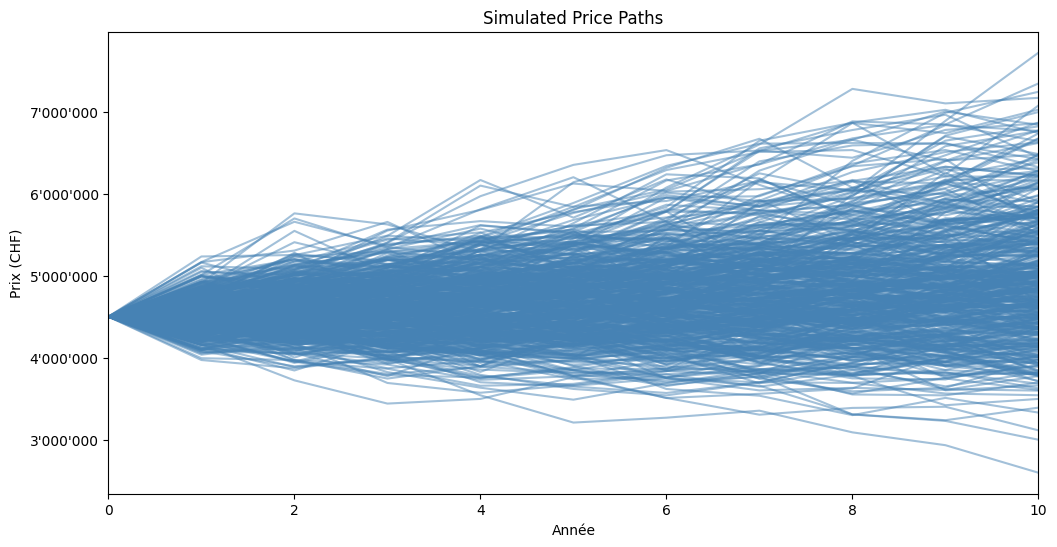

In [8]:
# Simulations
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Paramètres pour le mouvement brownien géométrique
mu = 0.01  # Taux de rendement attendu
sigma = 0.05 # Volatilité
dt = 1  # Incrément temps -> Annuel
P0 = 4500000 

# Paramètres pour la distribution uniforme du taux de vacance
vacancy_rate_min = 0.00
vacancy_rate_max = 0.01


def simulate_prices_and_vacancy(T, P0, mu, sigma, dt, vacancy_rate_min, vacancy_rate_max):
    prices = [P0]
    vacancy_rates = [random.uniform(vacancy_rate_min, vacancy_rate_max)]

    for t in range(1, T + 1):
        # Générer un mouvement brownien géométrique pour les prix
        dW = np.random.normal(0, np.sqrt(dt))
        dP = mu * prices[-1] * dt + sigma * prices[-1] * dW
        new_price = prices[-1] + dP
        prices.append(new_price)

        # Générer un taux de vacance aléatoire à partir d'une distribution uniforme
        vacancy_rate = random.uniform(vacancy_rate_min, vacancy_rate_max)
        vacancy_rates.append(vacancy_rate)

    return prices, vacancy_rates



# Run simulations 
num_simulations_to_plot = 500

price_paths = []
vacancy_rate_paths = []

for i in range(num_simulations_to_plot):
    prices, vacancy_rates = simulate_prices_and_vacancy(T, P0, mu, sigma, dt, vacancy_rate_min, vacancy_rate_max)
    price_paths.append(prices)
    vacancy_rate_paths.append(vacancy_rates)

price_df = pd.DataFrame(price_paths).T

# Plot simulations
plt.figure(figsize=(12, 6))
plt.title('Simulated Price Paths')

for i in range(num_simulations_to_plot):
    plt.plot(price_df[i], alpha=0.5, color='steelblue')

plt.xlabel('Année')
plt.ylabel('Prix (CHF)')

# Format the y-axis 
def custom_price_formatter(x, _):
    return "{:,.0f}".format(x).replace(",", "'")

formatter = ticker.FuncFormatter(custom_price_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlim(0, T)  

plt.show()


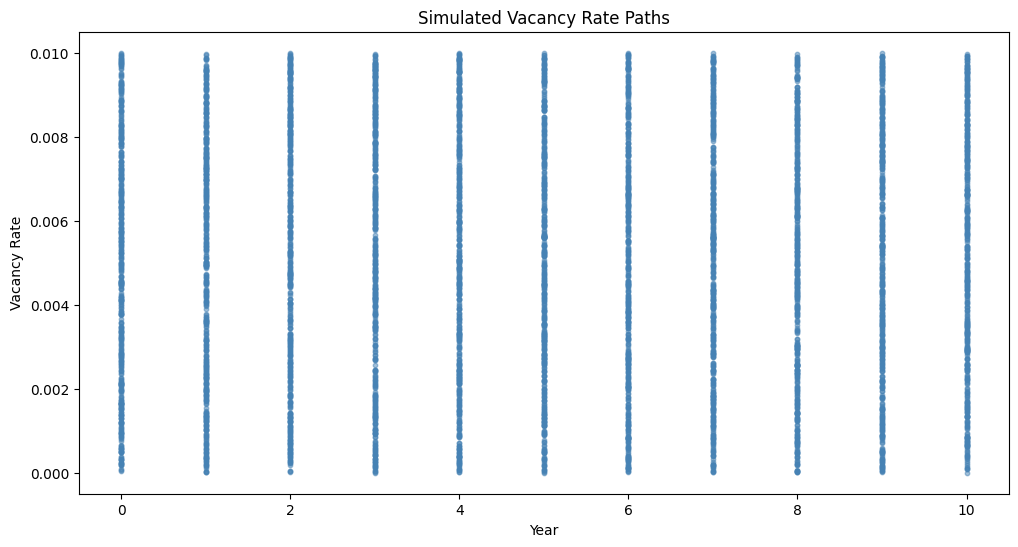

In [9]:
vacancy_rate_df = pd.DataFrame(vacancy_rate_paths).T

plt.figure(figsize=(12, 6))
plt.title('Simulated Vacancy Rate Paths')

for i in range(num_simulations_to_plot):
    plt.scatter(range(T + 1), vacancy_rate_df[i], alpha=0.5, color='steelblue', s=10)

plt.xlabel('Year')
plt.ylabel('Vacancy Rate')

plt.show()


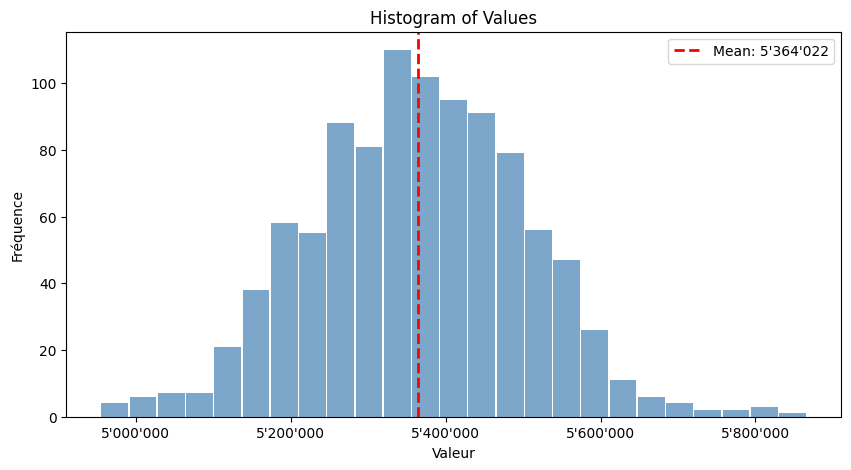

In [10]:
# INPUTS
T = 10
k = 0.04  # taux d'actualisation
g_rent = 0.01  # tx croissance loyer
g_exp = 0.01  # tx croissance dép. courantes 
g_wk = 0.005  # tx croissance dép. capital
g_inf = 0.01  # taux infty 
Rent_0 = 100000
Exp_0 = 30000
Wk_0 = 100000
eta = 0.005  # tx de vaances 
kappa = 0.01 # prob. dépenses en capital 
tau = 0.12   # tx imposition 

# Paramètres pour le mouvement brownien géométrique
mu = 0.01  # Taux de rendement attendu
sigma = 0.01 # Volatilité
dt = 1  # Incrément temps -> Annuel
P0 = 4000000 

# Number of simulation 
num_simulations = 1000


# Flux de trésorerie
def cash_flows_futurs_st(T, Rent_0, Exp_0, Wk_0, g_rent, g_exp, g_wk, tau, eta, kappa):
    fcf = { "Année":[],
            "Rent": [],
            "Exp": [],
            "Wk": [],
            "taxe": [],
            "cash_flows": []}
    for i in range(T+1):
        Rent = Rent_0 * (1 + g_rent) ** i
        Exp = eta[i] * Exp_0 * (1 + g_exp) ** i
        Wk = kappa * Wk_0 * (1 + g_wk) ** i
        cash_flow = Rent-Exp-Wk
        taxe = tau*cash_flow
        fcf["Année"].append(i)
        fcf["Rent"].append(Rent)
        fcf["Exp"].append(Exp)
        fcf["Wk"].append(Wk)
        fcf["taxe"].append(taxe)
        fcf["cash_flows"].append(cash_flow)
    return fcf


def DCF_MC(T, Rent_0, Exp_0, Wk_0, g_rent, g_exp, g_wk, tau, eta, kappa, P_T):
    fcf = cash_flows_futurs_st(T, Rent_0, Exp_0, Wk_0, g_rent, g_exp, g_wk, tau, eta, kappa)

    df_fcf = pd.DataFrame(data=fcf)

    # Actualisés
    df_fcf["Actualisés"] = df_fcf["cash_flows"]*1/((1+k)**df_fcf["Année"])
    sum_cf = df_fcf["Actualisés"].sum()

    # valeur terminale 
    P_T_actualisee = P_T*1/((1+k)**T)

    V = P_T+sum_cf
    return V

# Run simulations 

price_paths = []
vacancy_rate_paths = []
V_sim = []

for i in range(num_simulations):
    prices, vacancy_rates = simulate_prices_and_vacancy(T, P0, mu, sigma, dt, vacancy_rate_min, vacancy_rate_max)
    V = DCF_MC(T, Rent_0, Exp_0, Wk_0, g_rent, g_exp, g_wk, tau, vacancy_rates, kappa, prices[-1])
    V_sim.append(V)
    price_paths.append(prices)
    vacancy_rate_paths.append(vacancy_rates)
    
# Plot object value 
def custom_number_formatter(x, _):
    return "{:,.0f}".format(x).replace(",", "'")

plt.figure(figsize=(10, 5))
plt.hist(V_sim, bins='auto', color='steelblue', alpha=0.7, rwidth=0.95)

plt.title('Histogram of Values')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

# Format the x-axis to display numbers with a thousands separator
formatter = ticker.FuncFormatter(custom_number_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Calculate the mean and add a vertical red line
mean = np.mean(V_sim)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {custom_number_formatter(mean, None)}")
plt.legend()

plt.show()



# 5. Intégration performance énergétique

## Thèmes à discuter: 

* **Horizon:** valoriser une rénovation demande un horizon d'investissement plus long que 10 ans  
* **Effect direct d'un batiment performant:** Charges diminuées, vacance plus basse,... comment mesurer de manière quantitative ces effets? 
* **Dépréciation du batiment/taux de rénovation:** Comment différencier dans la modélisation un batiment rénové? Comment les dépenses en capital futurs sont affectés? Comment évaluer l'incertitude des coûts d'une rénovation? Utiliser le delta entre rénovation nécessaire et rénovation "verte"?
* **Prime de risque:**

$$MV = \frac{\text{Gross Rental Income} - \text{Operating Expenses} - CAPEX}{\text{capitalization rate}} = \frac{ROI}{r_f+r_p-g}$$ 

Pour une propriété neutre en carbone, la prime de risque ($r_p$) est plus faible, car le risque de vacance peut être moindre et la liquidité du marché des propriétés peut être plus élevée. De plus, les investisseurs peuvent s'attendre à une croissance plus élevée des loyers (g) en raison de la plus grande volonté des locataires à payer. (Brändle et al. (2022))
